In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Simple Random Sampling

In [4]:
np.random.randint(1,100)

35

In [8]:
data = [np.random.randint(1,100) for _ in range(100)]

In [10]:
df = pd.DataFrame({
    'id': range(1,101),
    'value': data

})

In [14]:
df.head()

,id,value
0,1,91
1,2,78
2,3,2
3,4,3
4,5,16


In [16]:
df.shape

(100, 2)

In [18]:
new= df.sample(n=10, random_state=0)

In [20]:
new

,id,value
26,27,33
86,87,74
2,3,2
55,56,43
75,76,17
93,94,54
16,17,25
73,74,59
54,55,83
95,96,50


In [24]:
df['value'].mean()

49.24

In [26]:
new['value'].mean()

44.0

In [28]:
df['value'].std()

29.35746940901089

In [30]:
new['value'].std()

25.2938288477205

Strarified sampling

In [33]:
np.random.choice(['A','B','C'], 10)

array(['A', 'C', 'A', 'A', 'C', 'B', 'A', 'B', 'B', 'C'], dtype='<U1')

In [57]:
np.random.seed(0)
df=pd.DataFrame({
    'id': range(1,101),
    'value': np.random.randint(1,100,100),
    'category': np.random.choice(['A','B','C'],100)
})

In [59]:
df.head()

,id,value,category
0,1,45,A
1,2,48,B
2,3,65,C
3,4,68,A
4,5,68,B


In [61]:
df.category.value_counts()

category
A    36
C    35
B    29
Name: count, dtype: int64

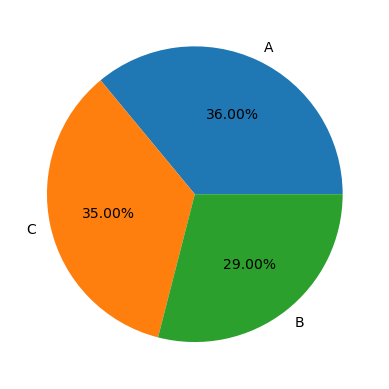

In [69]:
plt.pie(df.category.value_counts(), labels=df.category.value_counts().index, autopct='%2.2f%%');

In [71]:
new= df.sample(20, random_state=0)

In [73]:
new

,id,value,category
26,27,21,C
86,87,77,C
2,3,65,C
55,56,37,C
75,76,15,B
93,94,80,B
16,17,40,A
73,74,92,B
54,55,1,C
95,96,86,B


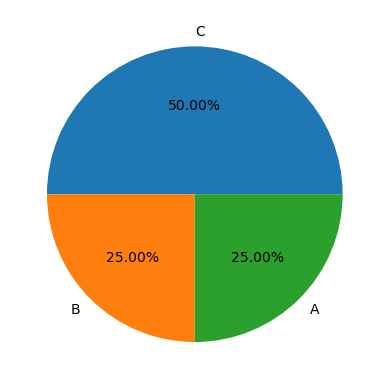

In [75]:
plt.pie(new.category.value_counts(), labels=new.category.value_counts().index, autopct='%2.2f%%');

In [93]:
def stratified_sample(df, strata_col, sample_size):
    # Group by the strata column
    grouped = df.groupby(strata_col)
    # calculate sample size per group
    n_per_group= sample_size // grouped.ngroups
    # Perform sampling
    stratified_sample = grouped.apply(lambda x: x.sample(
        n=n_per_group, random_state=1)).reset_index(drop=True)
    return stratified_sample

In [96]:
sdf=stratified_sample(df,'category',21)

C:\Users\duasp\AppData\Local\Temp\ipykernel_8488\4225775293.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = grouped.apply(lambda x: x.sample(


In [98]:
sdf

,id,value,category
0,85,48,A
1,98,50,A
2,79,43,A
3,9,37,A
4,61,80,A
5,59,39,A
6,65,32,A
7,71,12,B
8,86,4,B
9,80,85,B


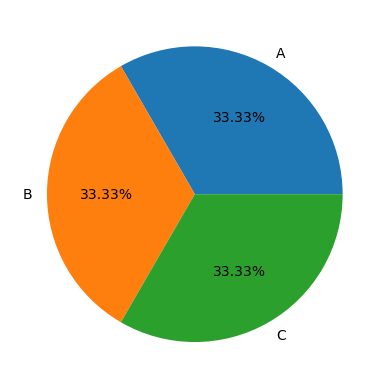

In [100]:
plt.pie(sdf.category.value_counts(), labels=sdf.category.value_counts().index, autopct='%2.2f%%');

In [122]:
def propotional_stratified_sample(df, strata_col, sample_size):
    # Group by the strata column
    grouped = df.groupby(strata_col)
    # Perform proportional sampling
    stratified_sample = grouped.apply(lambda x: x.sample(
        frac=sample_size/len(df), random_state=0)).reset_index(drop=True)
    return stratified_sample

In [142]:
ndf = propotional_stratified_sample(df, 'category',20)

C:\Users\duasp\AppData\Local\Temp\ipykernel_8488\822817412.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = grouped.apply(lambda x: x.sample(


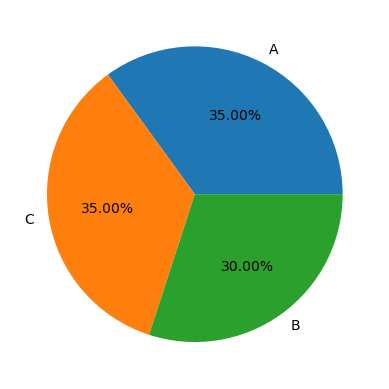

In [144]:
plt.pie(ndf.category.value_counts(), labels=ndf.category.value_counts().index, autopct='%2.2f%%');

In [154]:
iris = sns.load_dataset('iris')

In [158]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [160]:
iris.shape

(150, 5)

Cluster Based Sampling

In [163]:
df=pd.DataFrame({
    'id': range(1,101),
    'value': np.random.randint(1,100,100),
    'cluster': np.random.choice(['cluster1','cluster2','cluster3','cluster4','cluster5'], 100)
})

In [165]:
df

,id,value,cluster
0,1,19,cluster4
1,2,41,cluster4
2,3,55,cluster2
3,4,80,cluster3
4,5,12,cluster5
...,...,...,...
95,96,3,cluster1
96,97,70,cluster4
97,98,13,cluster2
98,99,45,cluster5


In [167]:
def cluster_sample(df, cluster_col,num_clusters):
    # Get unique clusters
    clusters= df[cluster_col].unique()
    # Randomly select the desired number of clusters
    selected_clusters = np.random.choice(clusters, num_clusters, replace=False)
    # Select all rows from the chosen clusters
    cluster_sampled_data = df[df[cluster_col].isin(selected_clusters)]
    return cluster_sampled_data

In [169]:
cluster_sample(df, 'cluster',3)

,id,value,cluster
2,3,55,cluster2
4,5,12,cluster5
7,8,2,cluster2
8,9,96,cluster2
9,10,45,cluster2
10,11,89,cluster2
12,13,68,cluster1
14,15,4,cluster2
15,16,77,cluster5
17,18,87,cluster2


Systematic Sampling

In [172]:
df= pd.DataFrame({
    'id': range(1,101),
    'value': np.random.randint(1,100,100)
})

In [174]:
def systematic_sample(df, sample_size):
    # calculate the sampling interval
    k= len(df) // sample_size
    # Generate a random start
    start = np.random.randint(0, k)
    # Select every k-th element starting from the random start
    systematic_sample= df.iloc[start::k].reset_index(drop=True)
    return systematic_sample

In [207]:
systematic_sample(df, 10).head()

,id,value
0,7,55
1,17,52
2,27,4
3,37,92
4,47,84


Stratification

In [210]:
iris = sns.load_dataset('iris')

In [214]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [220]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [222]:
from sklearn.model_selection import train_test_split

In [224]:
train, test=train_test_split(iris, random_state=0)

In [226]:
train['species'].value_counts()

species
virginica     41
setosa        37
versicolor    34
Name: count, dtype: int64

In [228]:
test['species'].value_counts()

species
versicolor    16
setosa        13
virginica      9
Name: count, dtype: int64

In [230]:
train, test=train_test_split(iris, random_state=0, stratify=iris['species'])

In [232]:
train['species'].value_counts()

species
virginica     38
versicolor    37
setosa        37
Name: count, dtype: int64

In [234]:
test['species'].value_counts()

species
setosa        13
versicolor    13
virginica     12
Name: count, dtype: int64